In [1]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [4]:
X_train = X_train/255
X_test = X_test/255

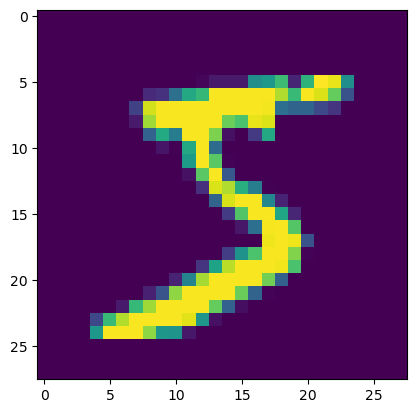

In [5]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0])

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_train = np.pad(X_train, ((0,0),(2,2),(2,2)), 'constant')
X_train.shape

(60000, 32, 32)

In [8]:
X_test = np.pad(X_test, ((0,0),(2,2),(2,2)), 'constant')
X_test.shape

(10000, 32, 32)

In [9]:
from keras.layers import Conv2D, AveragePooling2D, Dense, Flatten
from keras import Sequential

In [10]:
model = Sequential()
model.add(Conv2D(filters=6, kernel_size=(5,5), activation='tanh', input_shape=(32,32,1)))
model.add(AveragePooling2D(pool_size=(2,2), strides=2))
model.add(Conv2D(filters=16, kernel_size=(5,5)))
model.add(AveragePooling2D(pool_size=(2,2), strides=2))
model.add(Flatten())
model.add(Dense(units=120, activation='tanh'))
model.add(Dense(units=84, activation='tanh'))
model.add(Dense(units=10, activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (Average  (None, 14, 14, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 5, 5, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

In [12]:
model.compile(loss='sparse_categorical_crossentropy', optimizer = 'Adam', metrics=['accuracy'])

In [13]:
history = model.fit(X_train, y_train, epochs = 15, validation_split = 0.2)

Epoch 1/15
1500/1500 [==============================] - 19s 12ms/step - loss: 0.2628 - accuracy: 0.9208 - val_loss: 0.1585 - val_accuracy: 0.9517
Epoch 2/15
1500/1500 [==============================] - 17s 11ms/step - loss: 0.1175 - accuracy: 0.9643 - val_loss: 0.1034 - val_accuracy: 0.9699
Epoch 3/15
1500/1500 [==============================] - 17s 11ms/step - loss: 0.0805 - accuracy: 0.9754 - val_loss: 0.0787 - val_accuracy: 0.9756
Epoch 4/15
1500/1500 [==============================] - 17s 11ms/step - loss: 0.0608 - accuracy: 0.9815 - val_loss: 0.0771 - val_accuracy: 0.9772
Epoch 5/15
1500/1500 [==============================] - 17s 11ms/step - loss: 0.0495 - accuracy: 0.9847 - val_loss: 0.0698 - val_accuracy: 0.9777
Epoch 6/15
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0405 - accuracy: 0.9872 - val_loss: 0.0792 - val_accuracy: 0.9760
Epoch 7/15
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0356 - accuracy: 0.9887 - val_loss: 0.0651 -

In [14]:
from sklearn.metrics import accuracy_score

y_prob = model.predict(X_test)
y_prob.argmax(axis = 1)
y_pred = y_prob.argmax(axis = 1)
accuracy_score(y_test, y_pred)

313/313 [==============================] - 2s 5ms/step


0.9824

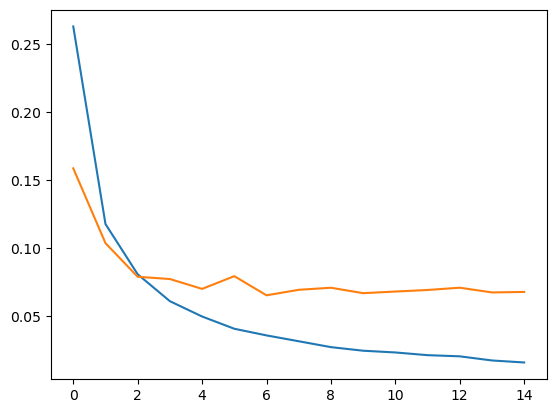

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

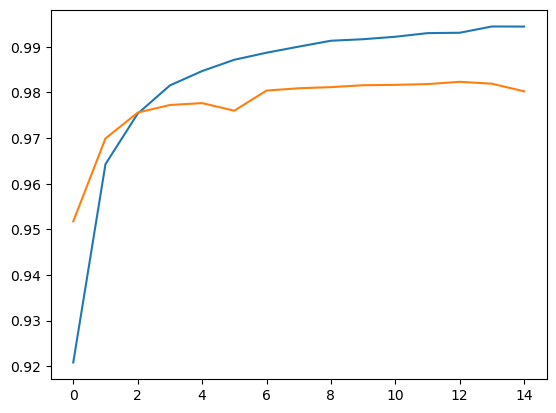

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])